1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['Score']=np.round((df['reading score']+df['math score']+df['writing score'])/3,0)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Score                        1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
# no missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Score                          0
dtype: int64

In [8]:
df.shape

(1000, 9)

In [9]:
df.describe()

,math score,reading score,writing score,Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.762000
std,15.16308,14.600192,15.195657,14.258354
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.000000
50%,66.00000,70.000000,69.000000,68.000000
75%,77.00000,79.000000,79.000000,78.000000
max,100.00000,100.000000,100.000000,100.000000


In [10]:
df[df['math score']<=20]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score
17,female,group B,some high school,free/reduced,none,18,32,28,26.0
59,female,group C,some high school,free/reduced,none,0,17,10,9.0
787,female,group B,some college,standard,none,19,38,32,30.0
980,female,group B,high school,free/reduced,none,8,24,23,18.0


In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

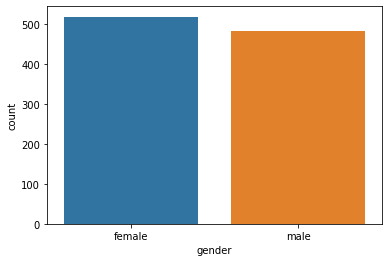

In [12]:
sns.countplot(x=df['gender'])

array([<AxesSubplot: ylabel='test preparation course'>], dtype=object)

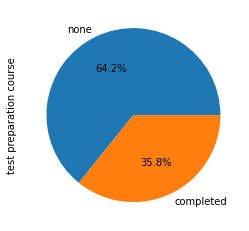

In [13]:
c=round(df['test preparation course'].value_counts()/df.shape[0]*100,2)
c.plot.pie(autopct="%1.1f%%",subplots=True)

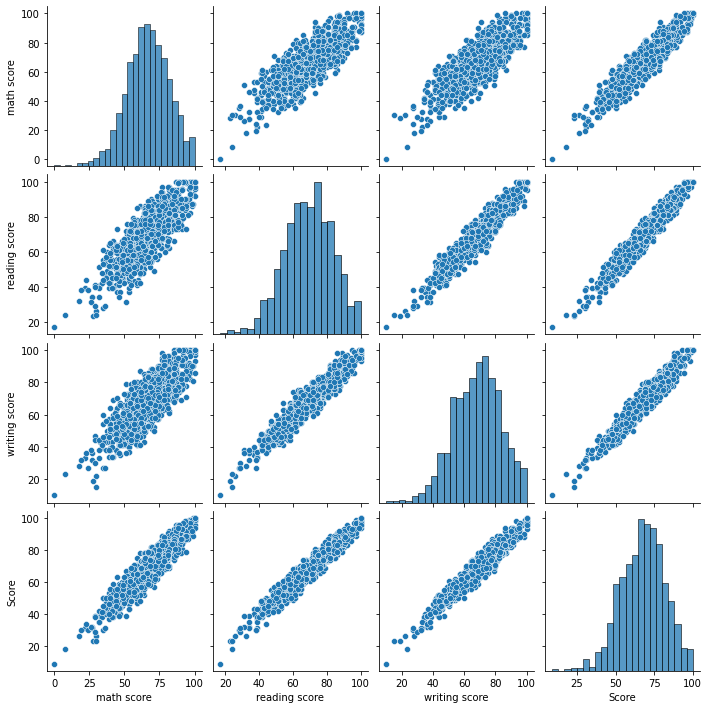

In [14]:
sns.pairplot(df)

<AxesSubplot: xlabel='reading score', ylabel='writing score'>

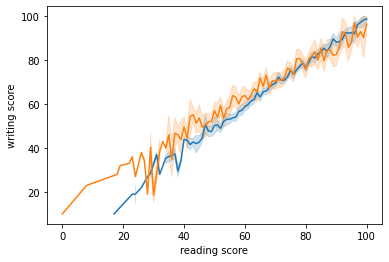

In [15]:
sns.lineplot(data=df,x='reading score',y='writing score')
sns.lineplot(data=df,x='math score',y='writing score')
#plt.legend()

<AxesSubplot: xlabel='race/ethnicity', ylabel='writing score'>

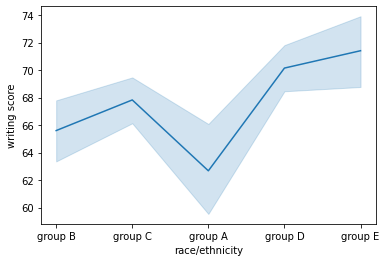

In [16]:
# group 
sns.lineplot(data=df,x='race/ethnicity',y='writing score')

<AxesSubplot: xlabel='race/ethnicity'>

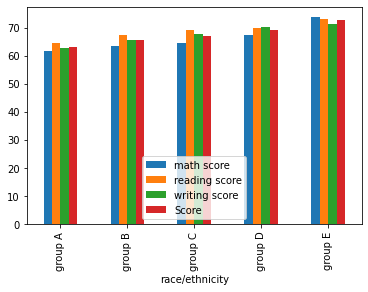

In [17]:
# group 
df.groupby('race/ethnicity').mean().plot.bar()

<AxesSubplot: xlabel='parental level of education'>

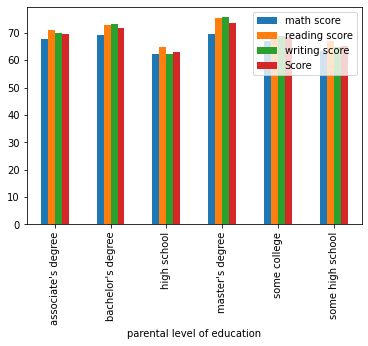

In [18]:
#parental level of education
df.groupby('parental level of education').mean().plot.bar()

<AxesSubplot: >

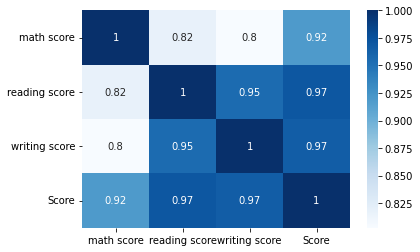

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [20]:
print('A : ',df[df['race/ethnicity']=='group A']['Score'].min(),':',df[df['race/ethnicity']=='group A']['Score'].max())
print('B : ',df[df['race/ethnicity']=='group B']['Score'].min(),':',df[df['race/ethnicity']=='group B']['Score'].max())
print('C : ',df[df['race/ethnicity']=='group C']['Score'].min(),':',df[df['race/ethnicity']=='group C']['Score'].max())
print('D : ',df[df['race/ethnicity']=='group D']['Score'].min(),':',df[df['race/ethnicity']=='group D']['Score'].max())
print('E : ',df[df['race/ethnicity']=='group E']['Score'].min(),':',df[df['race/ethnicity']=='group E']['Score'].max())

A :  23.0 : 96.0
B :  18.0 : 97.0
C :  9.0 : 99.0
D :  31.0 : 99.0
E :  26.0 : 100.0


Regression

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
j= ['gender', 'lunch', 'test preparation course','race/ethnicity','parental level of education']

transform=ColumnTransformer([('label_encode',OneHotEncoder(),j)],remainder='passthrough')


In [26]:
# split data+label
x=df.drop('Score',axis=1)
y=df['Score']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
# #  apply OneHotEncoder
x_train=transform.fit_transform(x_train)
x_test=transform.fit_transform(x_test)

In [32]:
#LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
print ('train accuracy : ',r2_score(y_train,LR.predict(x_train)))
print ('train accuracy : ',r2_score(y_test,LR.predict(x_test)))

train accuracy :  0.9996161311661349
train accuracy :  0.9996941579270728


In [33]:
#RandomForest
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print ('train accuracy : ',r2_score(y_train,RF.predict(x_train)))
print ('train accuracy : ',r2_score(y_test,RF.predict(x_test)))

train accuracy :  0.999464178261827
train accuracy :  0.992503602215161
